In [0]:
!pip3 install torch torchvision
!pip install torchsummary
!pip install pyunpack
!pip install patool

In [0]:
import torch.nn as nn
#import torch.nn.functional as F
import torch
from torchsummary import summary
from pyunpack import Archive
import os
from PIL import Image
import numpy as np
from IPython.display import Image
from torch.autograd import Variable

In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c cifar-10

In [89]:
!ls

generated  kaggle.json	sample_data  test.7z  train


In [0]:
#%mkdir /content/train
Archive('train.7z').extractall('.')

In [0]:
%rm sampleSubmission.csv
%rm train.7z
%rm trainLabels.csv
!ls

kaggle.json  sample_data  test.7z  train


In [0]:
import cv2
from torch.utils.data import Dataset, DataLoader
class DataLoader(Dataset):
  def __init__(self,a,root_dir):
    self.a = a
    self.root_dir = root_dir
  def __len__(self):
      return len(a)
  def __getitem__(self, idx):
      img_name = os.path.join(self.root_dir, a[idx])
      target = cv2.imread(img_name,1)
      input_img = cv2.imread(img_name,0)
      #target = target/255
      input_img = input_img/255
      return input_img,target

In [0]:
# input to output
class Generator_1(nn.Module):
  def __init__(self):
    super(Generator_1,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(1,64,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(64,64,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,64,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv4 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv5 = nn.Sequential(
                                nn.Conv2d(128,128,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv6 = nn.Sequential(
                                nn.Conv2d(128,128,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv7 = nn.Sequential(
                                nn.Conv2d(128,128,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv8 = nn.Sequential(
                                nn.Conv2d(128,256,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.conv9 = nn.Sequential(
                                nn.Conv2d(256,256,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.conv10 = nn.Sequential(
                                nn.Conv2d(256,256,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.conv11 = nn.Sequential(
                                nn.Conv2d(256,256,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.conv12 = nn.Sequential(
                                nn.Conv2d(256,512,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(512),
                                nn.LeakyReLU(0.5)
                              )
    self.conv13 = nn.Sequential(
                                nn.Conv2d(512,512,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(512),
                                nn.LeakyReLU(0.5)
                              )
    self.conv14 = nn.Sequential(
                                nn.Conv2d(512,512,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(512),
                                nn.LeakyReLU(0.5)
                              )
    self.conv15 = nn.Sequential(
                                nn.Conv2d(512,512,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(512),
                                nn.LeakyReLU(0.5)
                              )
    
    
    #Deconvolution
    self.deconv1 = nn.Sequential(
                                nn.ConvTranspose2d(512,256,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv2 = nn.Sequential(
                                nn.ConvTranspose2d(256,256,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv3 = nn.Sequential(
                                nn.ConvTranspose2d(256,256,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv4 = nn.Sequential(
                                nn.ConvTranspose2d(256,128,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv5 = nn.Sequential(
                                nn.ConvTranspose2d(128,128,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv6 = nn.Sequential(
                                nn.ConvTranspose2d(128,128,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv7 = nn.Sequential(
                                nn.ConvTranspose2d(128,64,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv8 = nn.Sequential(
                                nn.ConvTranspose2d(64,64,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv9 = nn.Sequential(
                                nn.ConvTranspose2d(64,64,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv10 = nn.Sequential(
                                nn.ConvTranspose2d(64,32,kernel_size = 2,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv11 = nn.Sequential(
                                nn.ConvTranspose2d(32,32,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv12 = nn.Sequential(
                                nn.ConvTranspose2d(32,32,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv13 = nn.Sequential(
                                nn.ConvTranspose2d(32,3,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(3),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv14 = nn.Sequential(
                                nn.ConvTranspose2d(3,3,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(3),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv15 = nn.Sequential(
                                nn.ConvTranspose2d(3,3,kernel_size = 1,stride = 1),
                                nn.BatchNorm2d(3),
                                nn.LeakyReLU(0.5)
                              )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.conv6(x)
    x = self.conv7(x)
    x = self.conv8(x)
    x = self.conv9(x)
    x = self.conv10(x)
    x = self.conv11(x)
    x = self.conv12(x)
    x = self.conv13(x)
    x = self.conv14(x)
    x = self.conv15(x)
    
    x = self.deconv1(x)
    x = self.deconv2(x)
    x = self.deconv3(x)
    x = self.deconv4(x)
    x = self.deconv5(x)
    x = self.deconv6(x)
    x = self.deconv7(x)
    x = self.deconv8(x)
    x = self.deconv9(x)
    x = self.deconv10(x)
    x = self.deconv11(x)
    x = self.deconv12(x)
    x = self.deconv13(x)
    x = self.deconv14(x)
    x = self.deconv15(x)
    x = torch.tanh(x)
    return x
  

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = Generator_1().to(device)
#summary(model, (1, 32, 32))

In [0]:
class Discriminator_1(nn.Module):
  def __init__(self):
    super(Discriminator_1,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(3,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv4 = nn.Sequential(
                                nn.Conv2d(128,256,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.fc1 = nn.Sequential( 
                                nn.Linear(1024, 512),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc2 = nn.Sequential( 
                                nn.Linear(512, 128),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc3 = nn.Sequential( 
                                nn.Linear(128, 1),                             
                            )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = x.view(-1,1024)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = torch.sigmoid(x)
    return x
#model_2 = Discriminator_1().to(device)
#summary(model_2, (3, 32, 32))

In [0]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1)) * 0.9
    data = data.type(torch.cuda.FloatTensor)
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.ones(size, 1)) * 0.1
    data = data.type(torch.cuda.FloatTensor)
    return data

In [0]:
def train_discriminator(real,fake,optimizer):
  optimizer.zero_grad()
  N = real.size(0)
  #real_data
  prediction_real = discriminator(real)
  error_real = loss(prediction_real, ones_target(N))
  error_real.backward()
  
  #fake_data
  prediction_fake = discriminator(fake)
  error_fake = loss(prediction_fake,zeros_target(N))
  error_fake.backward()
  
  optimizer.step()
  
  return error_real + error_fake, prediction_real, prediction_fake

In [0]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    #data = Variable(torch.ones(1, 1))
    #data = data.type(torch.cuda.FloatTensor)
    # error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [0]:
a = os.listdir('/content/train')
root_dir = '/content/train'
dataset = DataLoader(a,root_dir)

In [0]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator_1().to(device)
discriminator = Discriminator_1().to(device)

In [0]:
import torch.optim as optim
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
loss = nn.BCELoss()
loss = nn.BCELoss()
#loss1 = nn.MSELoss()

In [0]:
image,output = dataset[3]

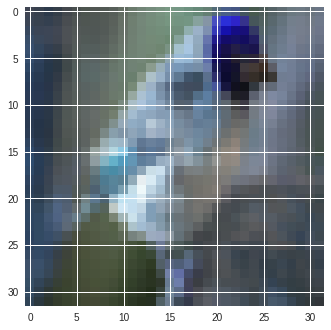

In [114]:
import matplotlib.pyplot as plt
plt.imshow(output)

In [115]:
mkdir /content/generated/

mkdir: cannot create directory ‘/content/generated/’: File exists


In [0]:
for epoch in range(10):
  for n_batch,(input_img,output_img) in enumerate(dataloader):
        N = input_img.size(0)
        # 1. Train Discriminator
        input_img = input_img.view(N,1,32,32)
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        input_img = input_img.to(device)
        input_img = input_img.type(torch.cuda.FloatTensor)
        output_img = output_img.view(N,3,32,32)
        output_img = output_img.to(device)
        output_img = output_img.type(torch.cuda.FloatTensor)
        generator.train()
        fake_data = generator(input_img).detach()
        
        # Train D
        if n_batch%2 == 0:
          d_error, d_pred_real, d_pred_fake = train_discriminator(output_img, fake_data,d_optimizer)
        # 2. Train Generator
        # Generate fake data
        fake_data = generator(input_img)
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        if(n_batch%300==0):
          print('epochs : {}'.format(epoch) , 'd_error : {}'.format(d_error) , 'g_error : {}'.format(g_error))
        # Display Progress every few batches
  torch.optim.lr_scheduler.StepLR(g_optimizer, 3, gamma=0.1, last_epoch=-1)
  generator.eval()
  image,_ = dataset[3]
  image = image.reshape((32,32,1))
  image = torch.from_numpy(image)
  image = image.type(torch.cuda.FloatTensor)
  image = image.view(1,1,32,32)
  target = generator(image).detach()
  b = target.to(torch.device("cpu"))
  b = b.numpy()
  b = np.reshape(b,(32,32,3))
  b = b*255
  cv2.imwrite('/content/generated/{}.png'.format(epoch),b)

In [0]:
sk = cv2.imread('/content/train/10000.png',0)
inp = np.empty((1,32,32))
inp[0,:,:] = np.array(sk)
inp = torch.from_numpy(inp)
inp = inp[np.newaxis, :] 
#inp = inp.permute(0, 1, 2)
inp.to(device)
inp.shape


torch.Size([1, 1, 32, 32])

In [0]:
out = generator(inp)